In [1]:
import geopandas as gpd
# reading the files
point=gpd.read_file("data/SJER_plot_centroids.shp")
polygon=gpd.read_file("data/SJER_crop.shp")

In [2]:
point.crs

<Derived Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

####  What is the coordinate reference system (crs) of “SJER_plot_centroids.shp”? 
CRS: WGS 84  
Unit: metre  
Datum: World Geodetic System 1984 ensemble  
Prime Meridian: Greenwich  


In [17]:
# How many data records (rows) are there in “SJER_crop.shp”? 
polygon.head()

,Id,geometry
0,0,"POLYGON ((254570.567 4112361.920, 258867.409 4..."


####  How many data records (rows) are there in “SJER_crop.shp”? 
One


<AxesSubplot:>

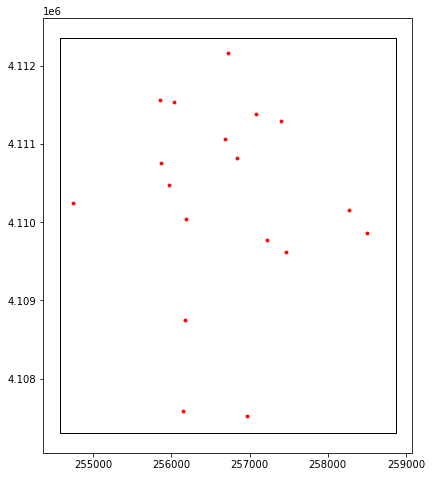

In [23]:
# Create a map showing both “SJER_plot_centroids.shp” and “SJER_crop.shp”
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
polygon.plot(ax=ax, color='white',edgecolor='black')
point.plot(ax=ax,marker="o", color='red', markersize=8)

<AxesSubplot:>

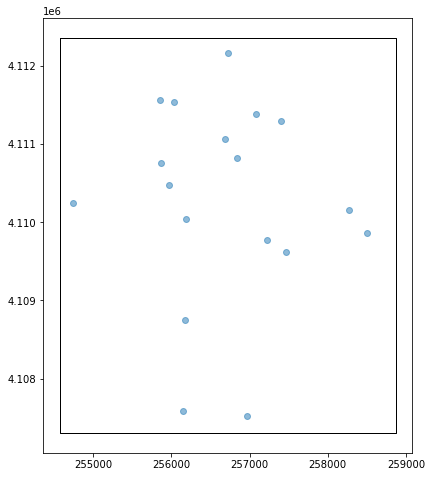

In [26]:
# Create a buffer on “SJER_plot_centroids.shp” with the buffer distance as 150 meters and show the map.
point_buffer = point.geometry.buffer(150)

fig, axes = plt.subplots(figsize=(8,8))

polygon.plot(ax=axes, color="white", edgecolor="black")
point.plot(ax=axes, alpha=0.5)

<AxesSubplot:>

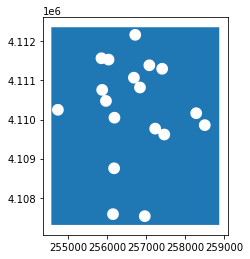

In [31]:
# Use overlay difference operation between “SJER_crop.shp” and the buffered “SJER_plot_centroids.shp” layer to get the area NOT within 150 meters of the sites.

point_buffer_gdf = gpd.GeoDataFrame(geometry=point_buffer)
difference = gpd.overlay(polygon,point_buffer_gdf, how="difference")
difference.plot()